[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eyaler/workshop/blob/master/nn_3_cifar.ipynb)

# 3. How to train and test your network (CIFAR)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras import Input, Model
from keras.layers import Dense, Dropout
from keras.datasets import mnist, cifar10
from keras.utils import to_categorical
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

Using TensorFlow backend.


In [0]:
# set random seeds for more reproducible results
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(43)

In [3]:
# load dataset
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)
if len(x_train.shape)==4:
    x_train = np.mean(x_train, axis=-1)
    x_test = np.mean(x_test, axis=-1)
train_size = len(y_train)
test_size = len(y_test)
xdim = x_train.shape[1]
ydim = x_train.shape[2]
print(x_train.dtype, y_train.dtype)

170500096/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3) (50000, 1)
float64 uint8


[[ 61.33333333  44.66666667  47.         ... 132.66666667 126.33333333
  125.        ]
 [ 18.66666667   0.           8.66666667 ...  88.66666667  84.
   88.66666667]
 [ 23.33333333   7.66666667  28.         ...  84.          84.66666667
   74.66666667]
 ...
 [158.         129.33333333 128.33333333 ... 121.          31.33333333
   35.66666667]
 [138.33333333 112.66666667 120.         ... 142.          64.33333333
   56.66666667]
 [145.66666667 130.33333333 136.         ... 180.         117.66666667
   95.66666667]]
[6]


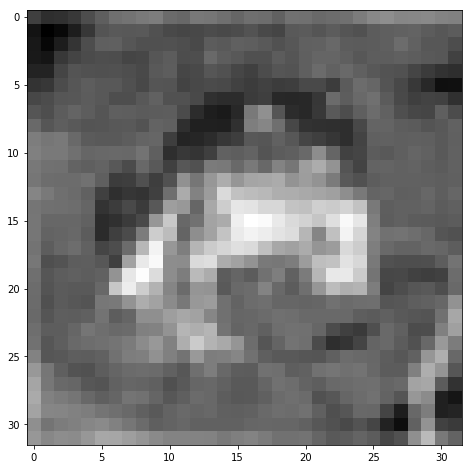

In [4]:
print(x_train[0])
print(y_train[0])
plt.imshow(x_train[0], cmap='gray')

In [5]:
print(np.min(x_train), np.max(x_train), np.median(x_train))
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

0.0 255.0 116.33333333333333
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


In [0]:
n_classes = len(np.unique(y_test))
x_train, y_train = shuffle(x_train, y_train, random_state=44)
x_train = x_train.reshape((train_size, -1))/255
x_test = x_test.reshape((test_size, -1))/255
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [0]:
dropout_prob = 0.5

def get_model():
    inputs = Input(shape=(xdim*ydim,))
    f = Dense(1024, activation='relu')(inputs)
    f = Dropout(dropout_prob)(f)
    f = Dense(1024, activation='relu')(f)
    f = Dropout(dropout_prob)(f)
    f = Dense(256, activation='relu')(f)
    f = Dropout(dropout_prob)(f)
    outputs = Dense(n_classes, activation='softmax')(f)
    return Model(inputs=inputs, outputs=outputs)

In [8]:
model = get_model()
print(model.summary())
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=300, validation_split=0.2)

W0814 12:51:58.676142 139750538508160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0814 12:51:58.678665 139750538508160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 12:51:58.684630 139750538508160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0814 12:51:58.704997 139750538508160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0814 12:51:58.714903 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

W0814 12:51:59.028591 139750538508160 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/300
40000/40000 [==============================] - 5s 137us/step - loss: 2.2817 - acc: 0.1423 - val_loss: 2.1626 - val_acc: 0.2332
Epoch 2/300
40000/40000 [==============================] - 4s 112us/step - loss: 2.1743 - acc: 0.1904 - val_loss: 2.0983 - val_acc: 0.2426
Epoch 3/300
40000/40000 [==============================] - 4s 112us/step - loss: 2.1198 - acc: 0.2191 - val_loss: 2.0364 - val_acc: 0.2771
Epoch 4/300
40000/40000 [==============================] - 5s 113us/step - loss: 2.0799 - acc: 0.2423 - val_loss: 2.0077 - val_acc: 0.2927
Epoch 5/300
40000/40000 [==============================] - 4s 112us/step - loss: 2.0486 - acc: 0.2548 - val_loss: 1.9868 - val_acc: 0.2950
Epoch 6/300
40000/40000 [==============================] - 5s 113us/step - loss: 2.0264 - acc: 0.2664 - val_loss: 1.9522 - val_acc: 0.3160
Epoch 7/300
40000/40000 [==============================] - 4s 112us/step - loss: 1.9993 - acc: 0.2772 - val_loss: 1.

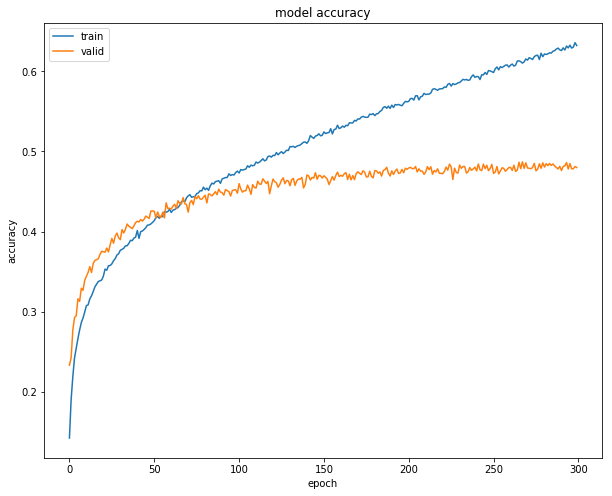

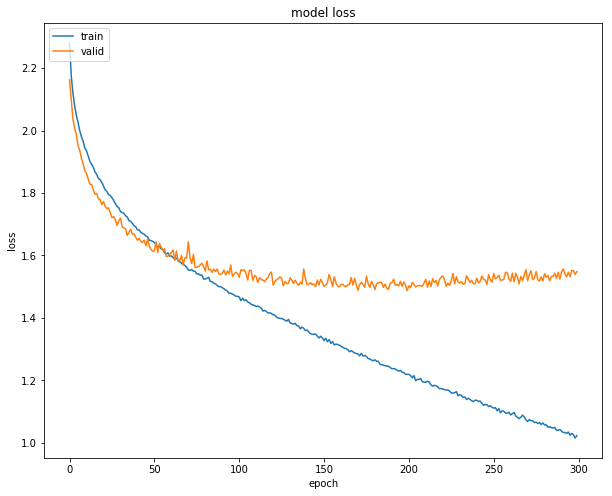

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [10]:
from sklearn.metrics import confusion_matrix
loss, acc = model.evaluate(x=x_test, y=y_test)
print(loss, acc)
targets = np.argmax(y_test, axis=-1)
probabilities = model.predict(x=x_test)
predictions = np.argmax(probabilities, axis=-1)
cm = confusion_matrix(y_true=targets, y_pred=predictions)
print(cm)

10000/10000 [==============================] - 1s 65us/step
1.5354187110900879 0.4853
[[444  50  72  25  90  12  99  23 129  56]
 [ 14 628   6  28  22   9  69  18  61 145]
 [ 61  20 323  78 197  78 155  38  25  25]
 [ 24  31  69 265 110 172 225  42  12  50]
 [ 36  20 113  53 452  39 175  72  29  11]
 [ 17  12  91 159  94 390 126  70  16  25]
 [ 15  34  58  42  88  22 677  19  11  34]
 [ 14  22  48  70 117  57  57 561  14  40]
 [ 87  92  20  29  58   9  47  20 573  65]
 [ 19 202  21  36  34   9  51  41  47 540]]


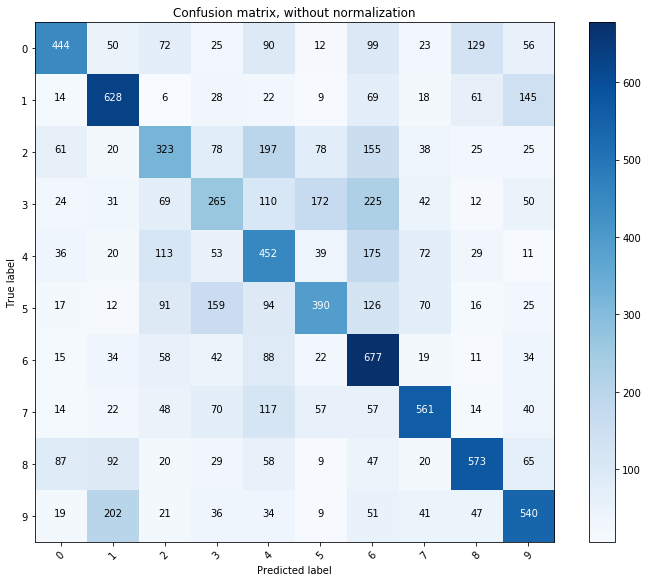

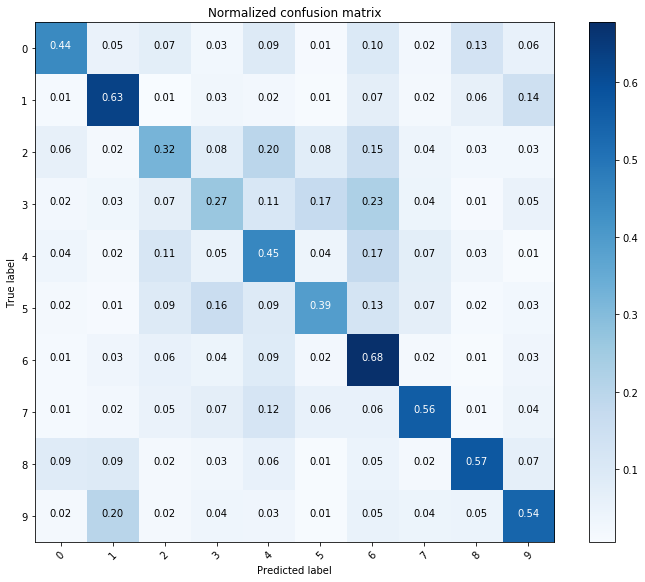

In [11]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix, without normalization'

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    np.set_printoptions(precision=2)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

classes = np.arange(n_classes)
plot_confusion_matrix(cm, classes=classes)
plot_confusion_matrix(cm, classes=classes, normalize=True)

In [12]:
from sklearn.metrics import classification_report
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
report = classification_report(y_true=targets, y_pred=predictions, labels=classes, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.61      0.44      0.51      1000
  automobile       0.57      0.63      0.59      1000
        bird       0.39      0.32      0.35      1000
         cat       0.34      0.27      0.30      1000
        deer       0.36      0.45      0.40      1000
         dog       0.49      0.39      0.43      1000
        frog       0.40      0.68      0.51      1000
       horse       0.62      0.56      0.59      1000
        ship       0.62      0.57      0.60      1000
       truck       0.54      0.54      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



loss	index	true		predicted	probability
1.5833	2323	ship		automobile		0.9993
1.5494	7119	dog		airplane		0.8498
1.4337	4748	airplane		automobile		0.9969
1.4272	9881	truck		automobile		0.9992
1.3852	5175	frog		automobile		0.9925
1.3530	6688	automobile		horse		0.9781
1.3037	9529	truck		dog		0.5553
1.2897	2532	airplane		automobile		0.9621
1.2599	7370	cat		automobile		0.9660
1.2446	9856	dog		automobile		0.9647


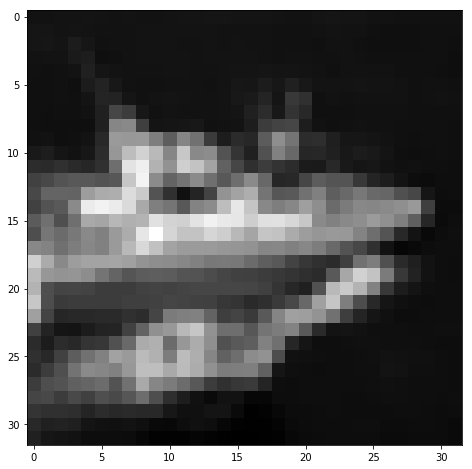

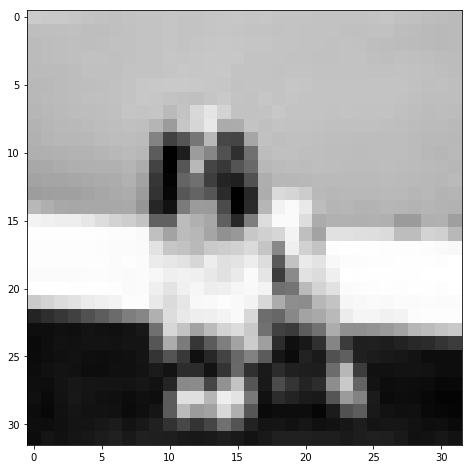

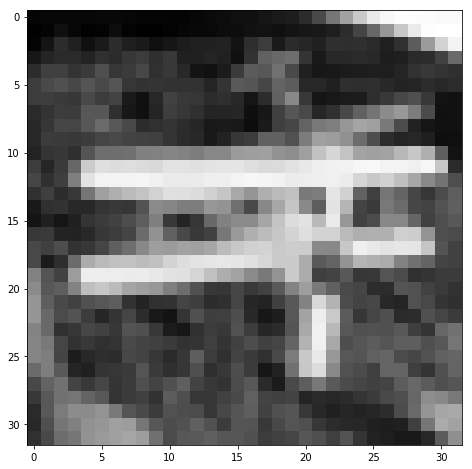

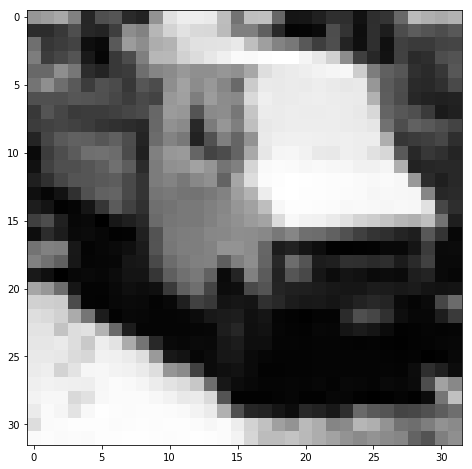

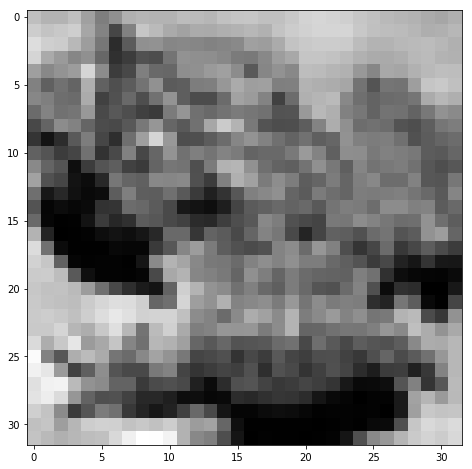

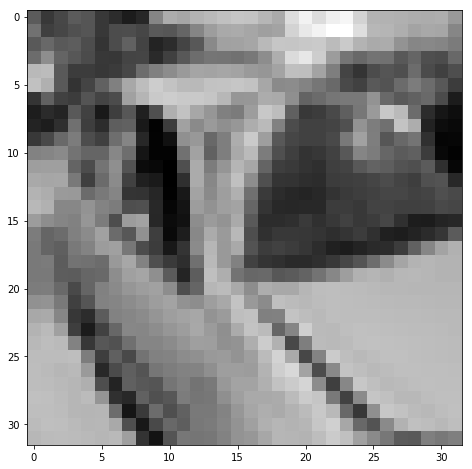

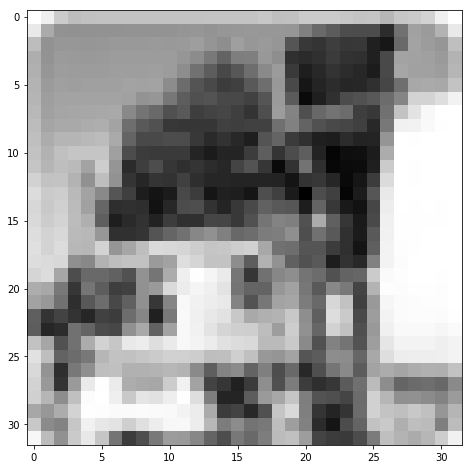

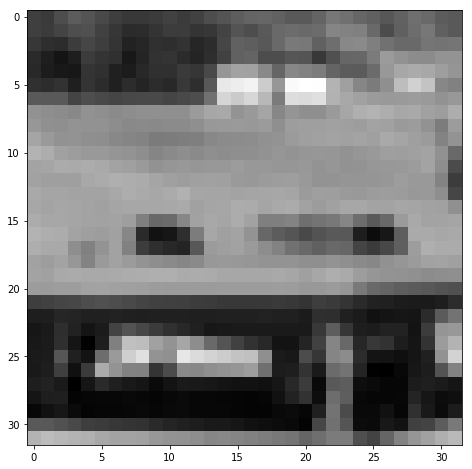

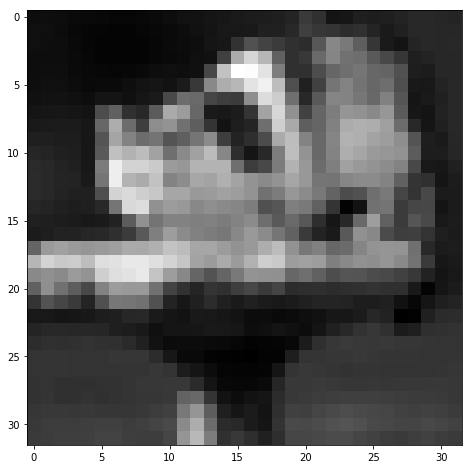

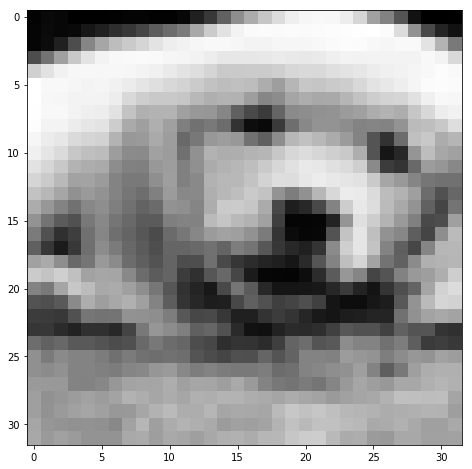

In [13]:
# top errors
from sklearn.metrics import log_loss
max_probs = np.max(probabilities, axis=-1)
losses = [log_loss(y_true=y, y_pred=prob, eps=1e-7) for y,prob in zip(y_test,probabilities)]
print('loss\tindex\ttrue\t\tpredicted\tprobability')
top_errors = sorted(list(zip(losses, np.arange(test_size), [class_names[t] for t in targets], [class_names[p] for p in predictions], max_probs)), reverse=True)[:10]
for error in top_errors:
    print('%.04f\t%d\t%s\t\t%s\t\t%.04f'%error)
    plt.figure()
    plt.imshow(x_test[error[1]].reshape((xdim, ydim)), cmap='gray')